### 1) Problem statement 
##
This project understands how the student's performance (test score) is affected by other variables such as Gender,Ethinicity,Parental Level of Education,Lunch and Test perparation course.


### 2)Import Data and Required Packages 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data/stud.csv")

In [3]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum() 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.value_counts()

gender  race_ethnicity  parental_level_of_education  lunch         test_preparation_course  math_score  reading_score  writing_score
female  group A         associate's degree           free/reduced  none                     37          57             56               1
male    group C         associate's degree           standard      completed                57          54             56               1
                                                     free/reduced  completed                60          51             56               1
                                                                                            65          67             65               1
                                                                                                        73             68               1
                                                                                                                                       ..
female  group D         associate's deg

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [12]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [13]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [14]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [15]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [16]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [17]:
#define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

#print columns 
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print("\n We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

 We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [18]:
df["Total Score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["average Score"]=df["Total Score"]/3

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full = df[df['reading_score'] == 100]["average Score"].count()
writing_full = df[df['writing_score'] == 100]["average Score"].count()
math_full = df[df['math_score'] == 100]["average Score"].count()

print("Number of students with full marks in reading: ", reading_full)
print("Number of students with full marks in writing: ", writing_full)
print("Number of students with full marks in math: ", math_full)

Number of students with full marks in reading:  17
Number of students with full marks in writing:  14
Number of students with full marks in math:  7


In [21]:
reading_less_20= df[df['reading_score'] < 20]["average Score"].count()
writing_less_20= df[df['writing_score'] < 20]["average Score"].count()
math_less_20= df[df['math_score'] < 20]["average Score"].count()

print("Number of students with less than 20 marks in reading: ", reading_less_20)
print("Number of students with less than 20 marks in writing: ", writing_less_20)
print("Number of students with less than 20 marks in math: ", math_less_20)

Number of students with less than 20 marks in reading:  1
Number of students with less than 20 marks in writing:  3
Number of students with less than 20 marks in math:  4


## Visualization

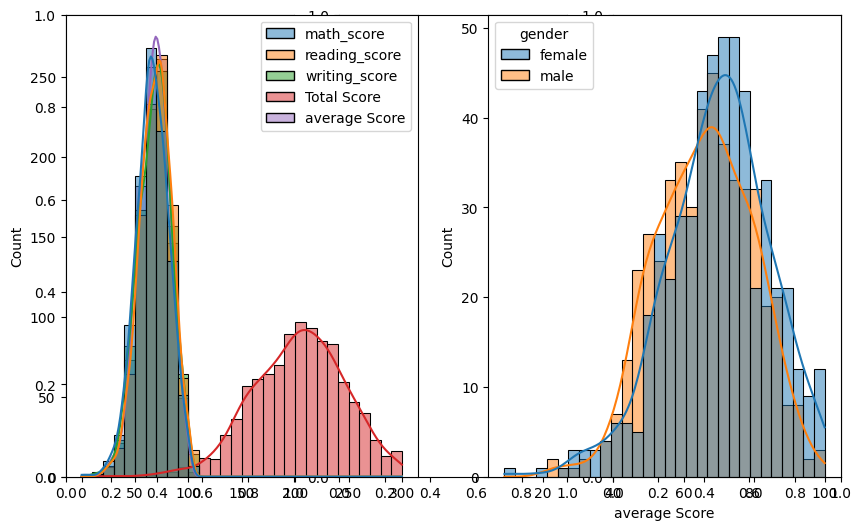

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
plt.subplot(121)
sns.histplot(data=df, kde=True, color='blue', bins=30)
plt.subplot(122)
sns.histplot(data=df,x='average Score', kde=True,hue='gender', bins=30)
plt.show()

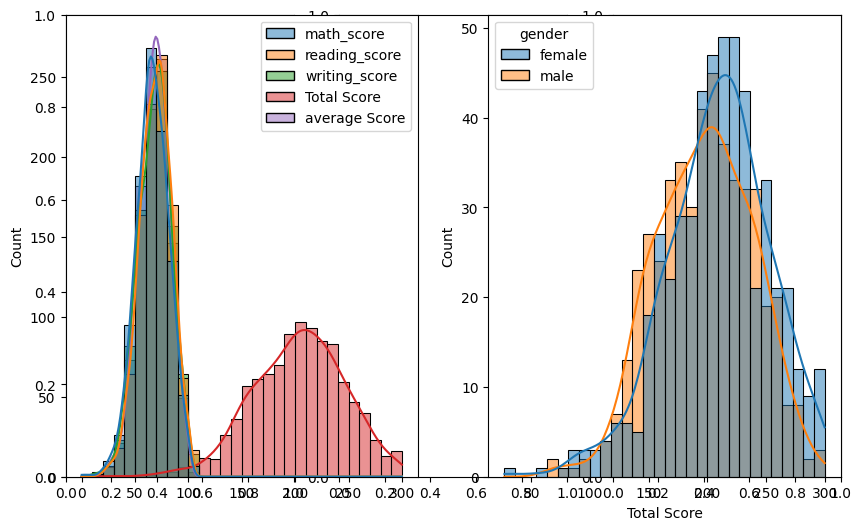

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
plt.subplot(121)
sns.histplot(data=df, kde=True, color='blue', bins=30)
plt.subplot(122)
sns.histplot(data=df,x='Total Score', kde=True,hue='gender', bins=30)
plt.show()

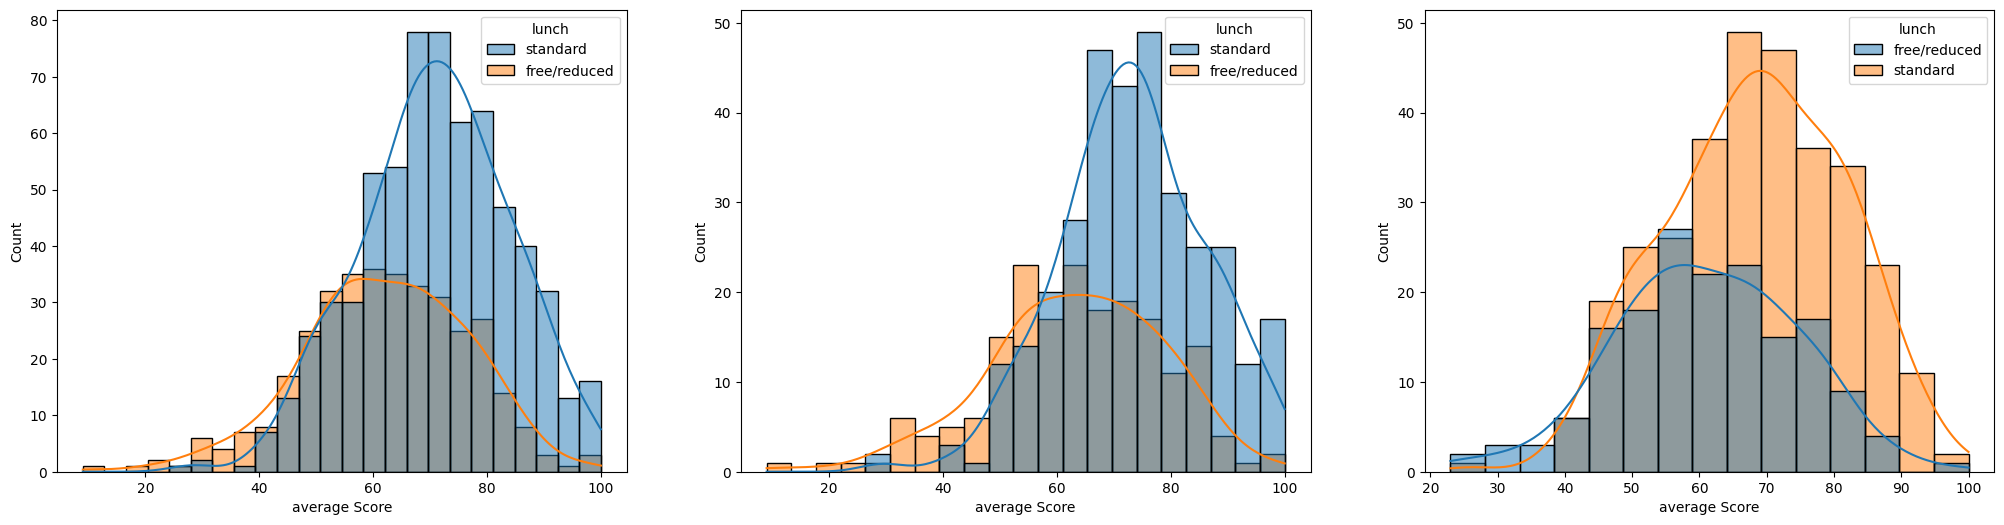

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average Score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average Score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average Score',kde=True,hue='lunch')
plt.show()

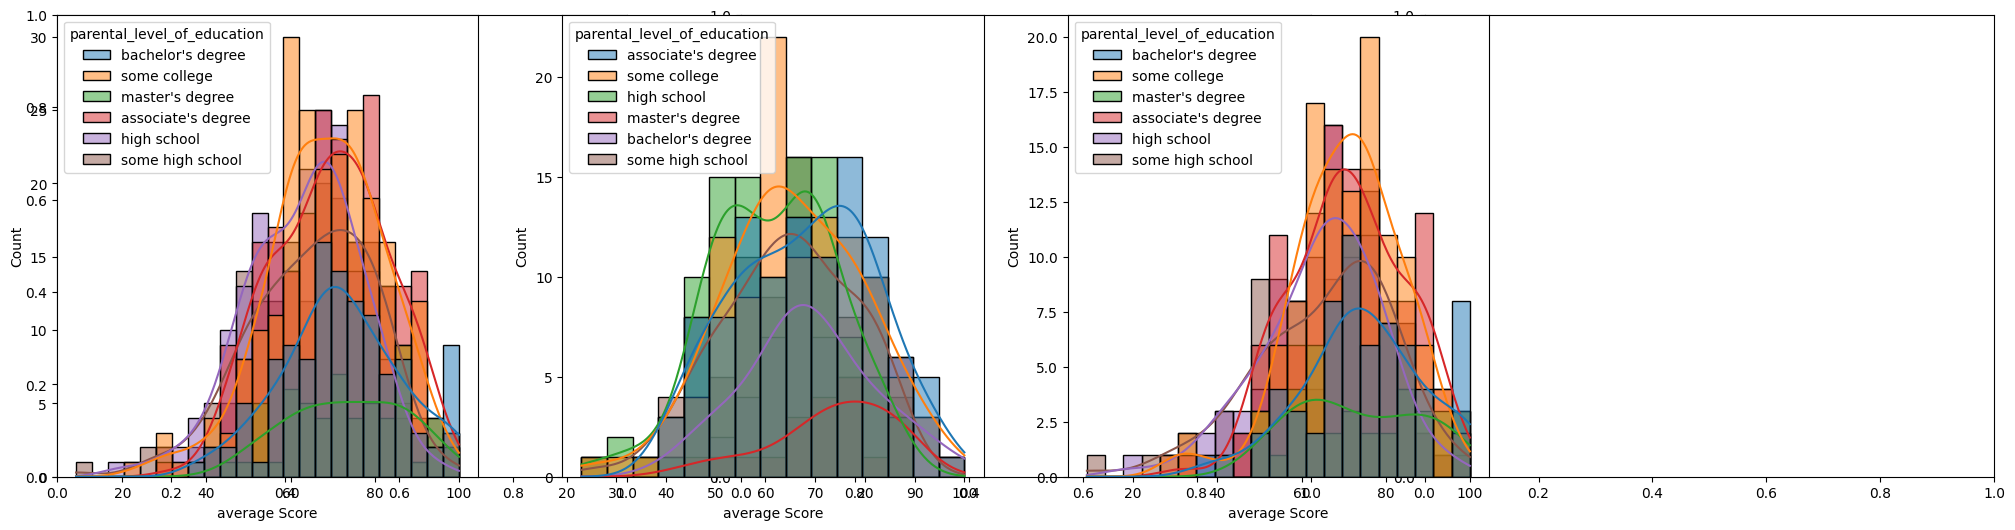

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average Score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average Score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average Score',kde=True,hue='parental_level_of_education')
plt.show()

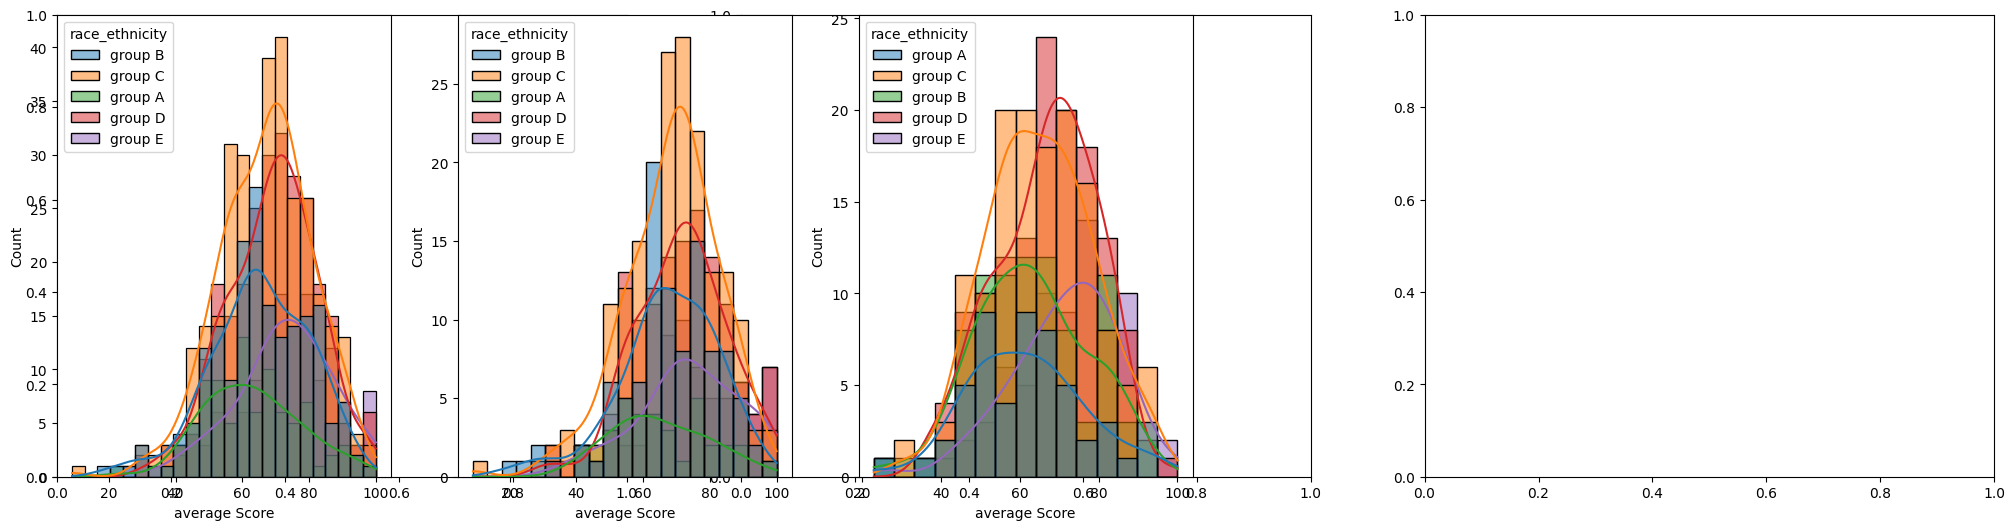

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(151)
ax =sns.histplot(data=df,x='average Score',kde=True,hue='race_ethnicity')
plt.subplot(152)
ax =sns.histplot(data=df[df.gender=='female'],x='average Score',kde=True,hue='race_ethnicity')
plt.subplot(153)
ax =sns.histplot(data=df[df.gender=='male'],x='average Score',kde=True,hue='race_ethnicity')
plt.show()

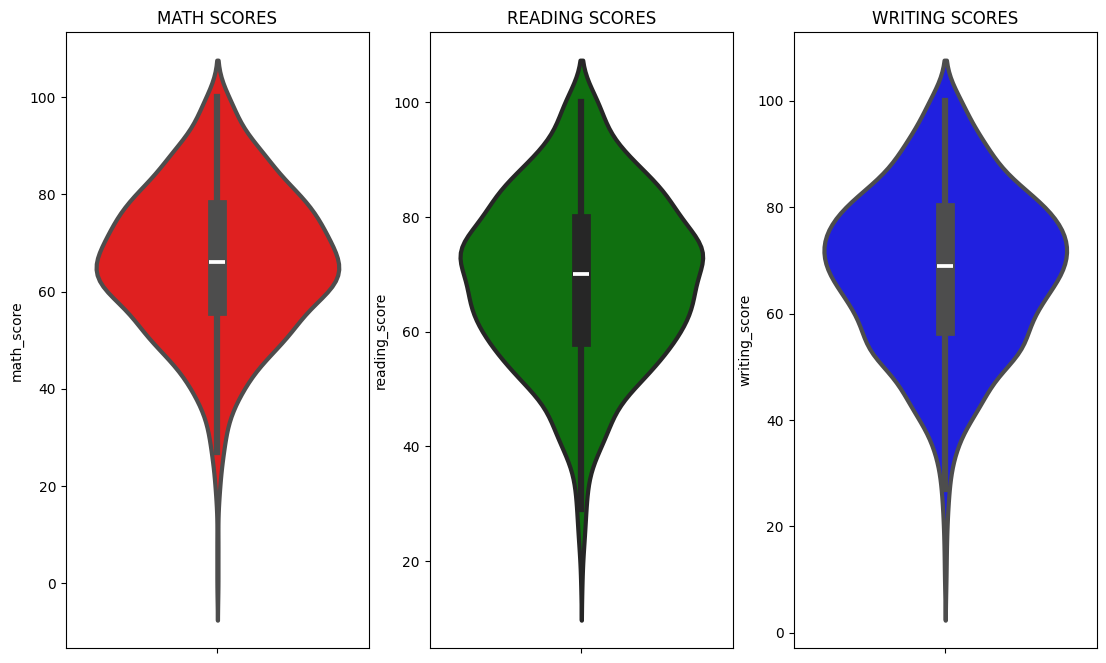

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

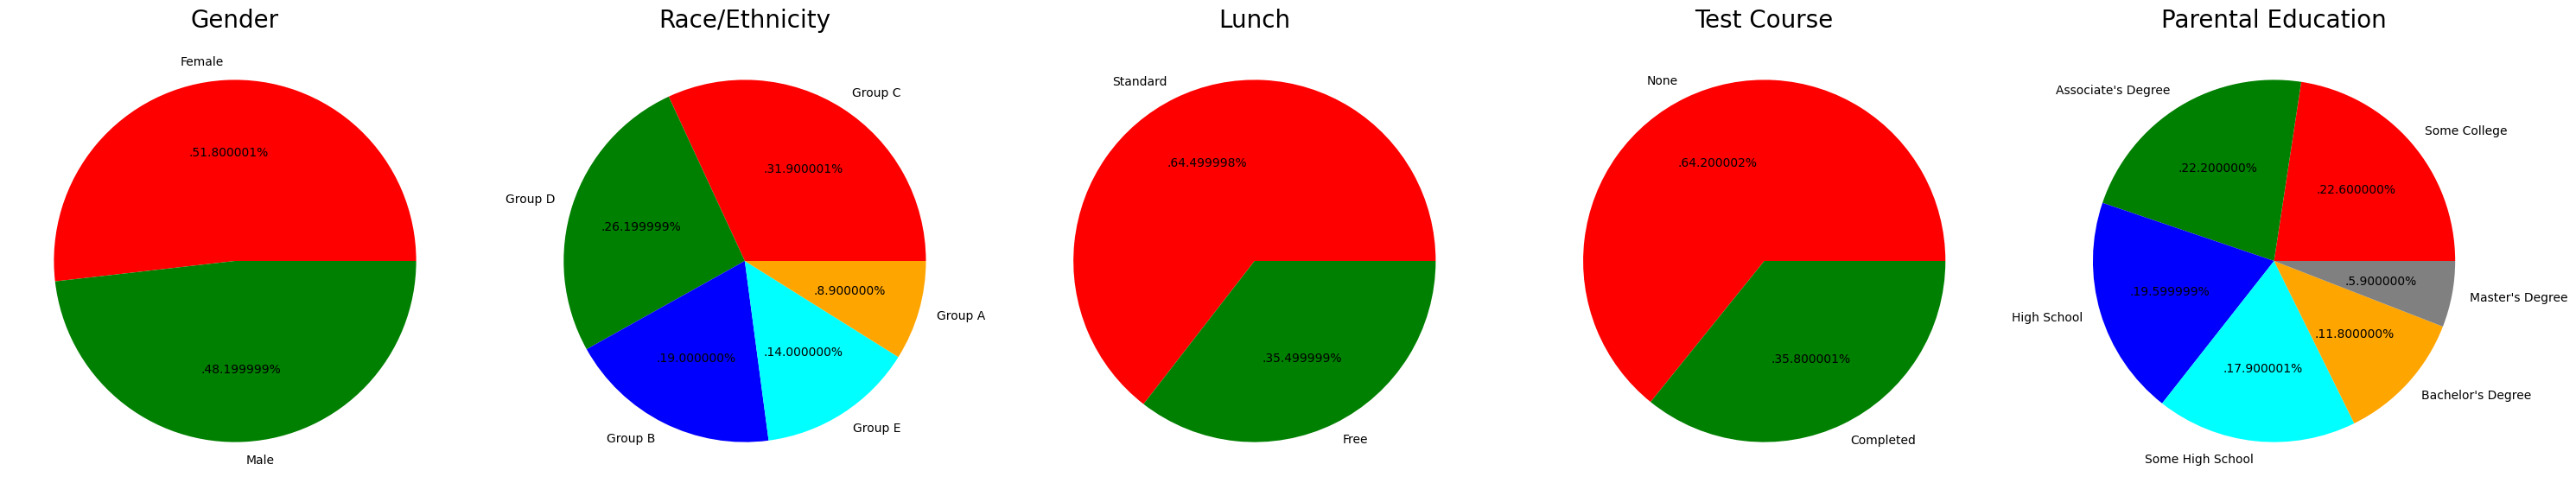

In [28]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

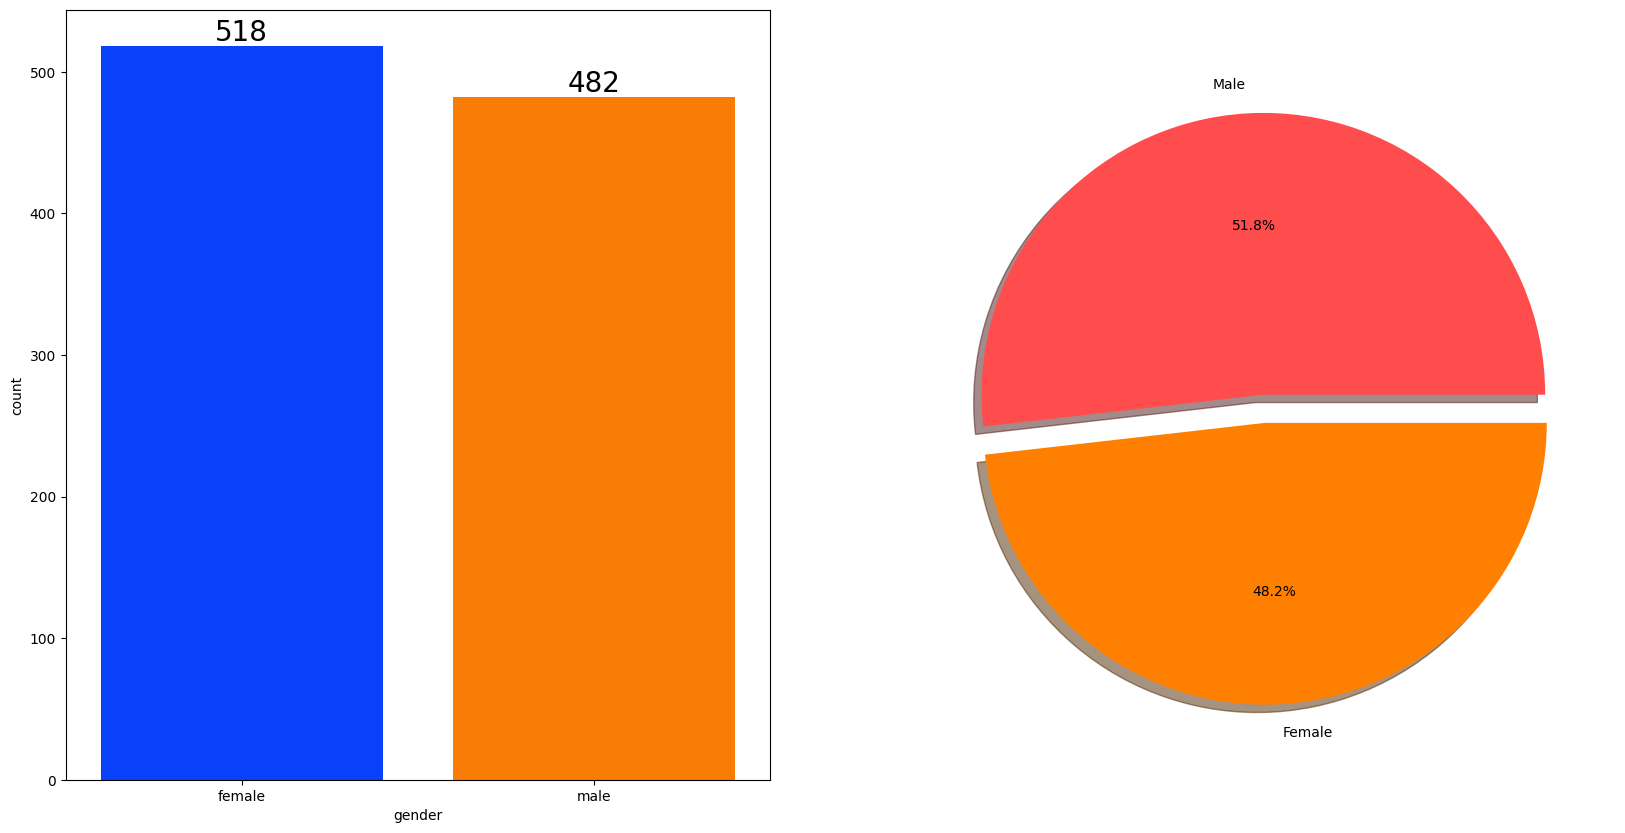

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [30]:
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'Total Score', 'average Score']].mean()
gender_group

,math_score,reading_score,writing_score,Total Score,average Score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

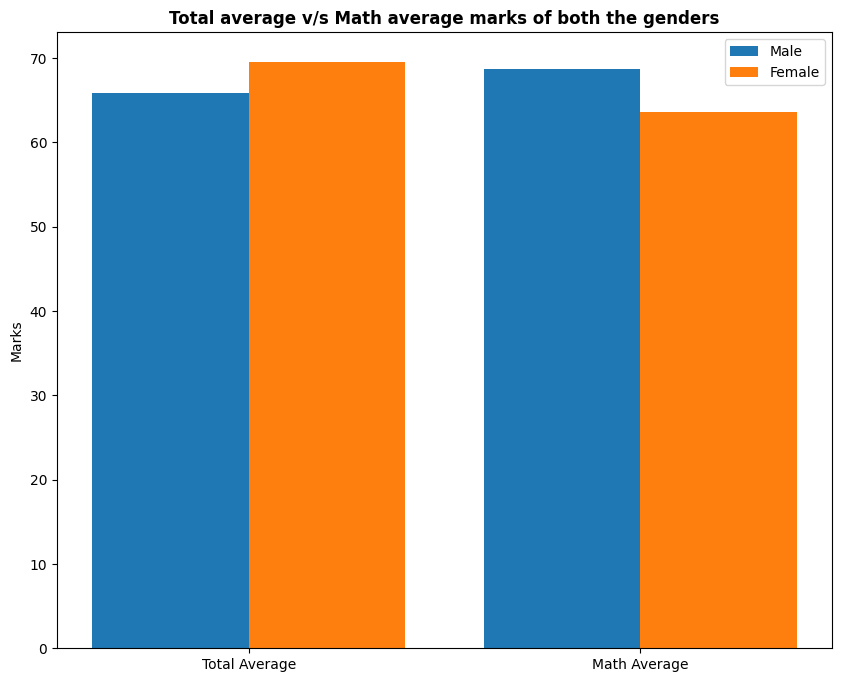

In [31]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group.loc['female', 'average Score'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average Score'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

RACE/EHNICITY COLUMN

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

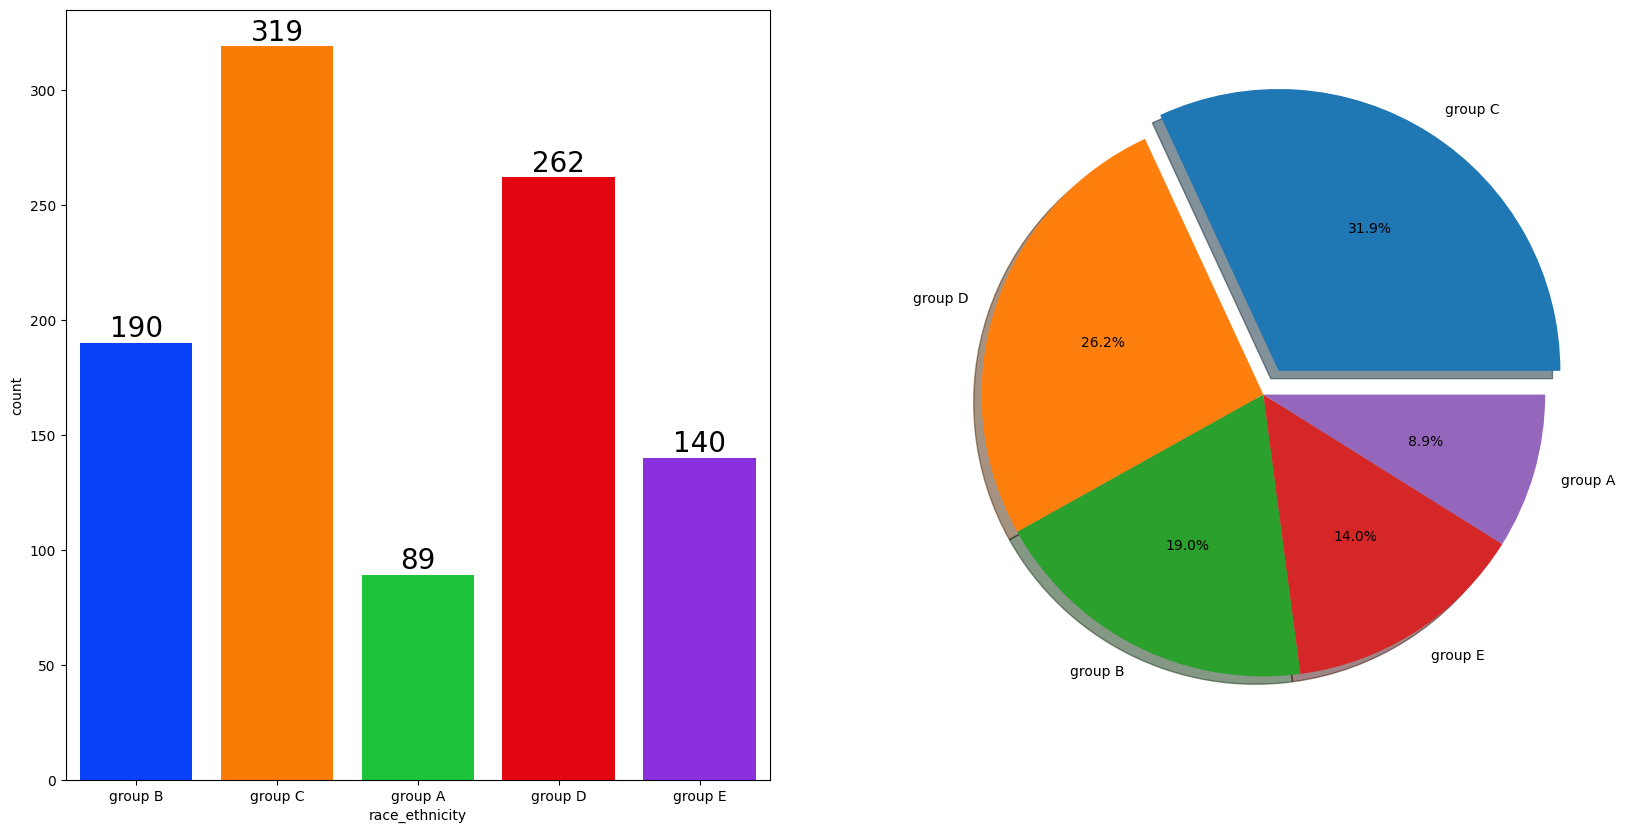

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

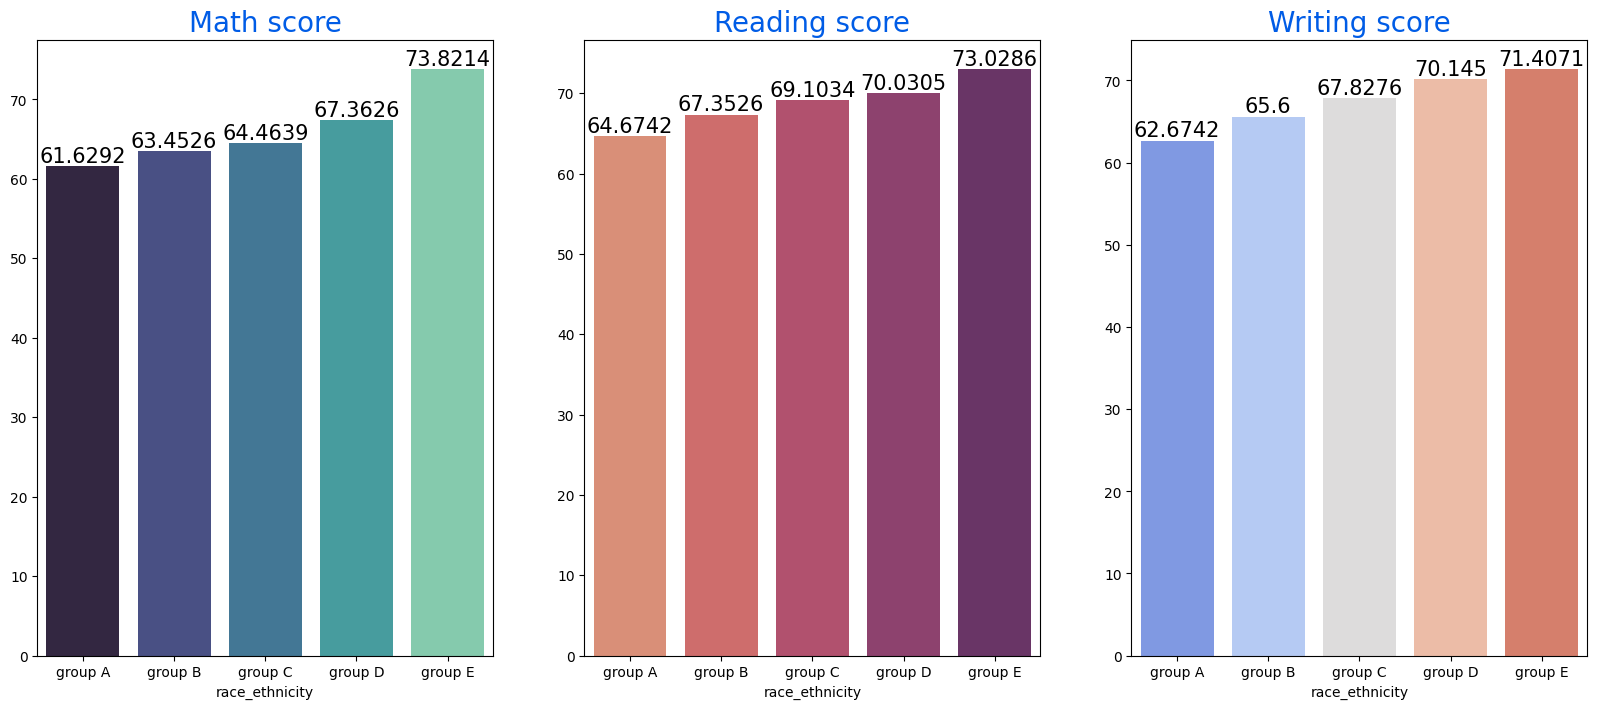

In [33]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## PARENTAL LEVEL OF EDUCATION COLUMN
##
What is educational background of student's parent ?
#
Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )


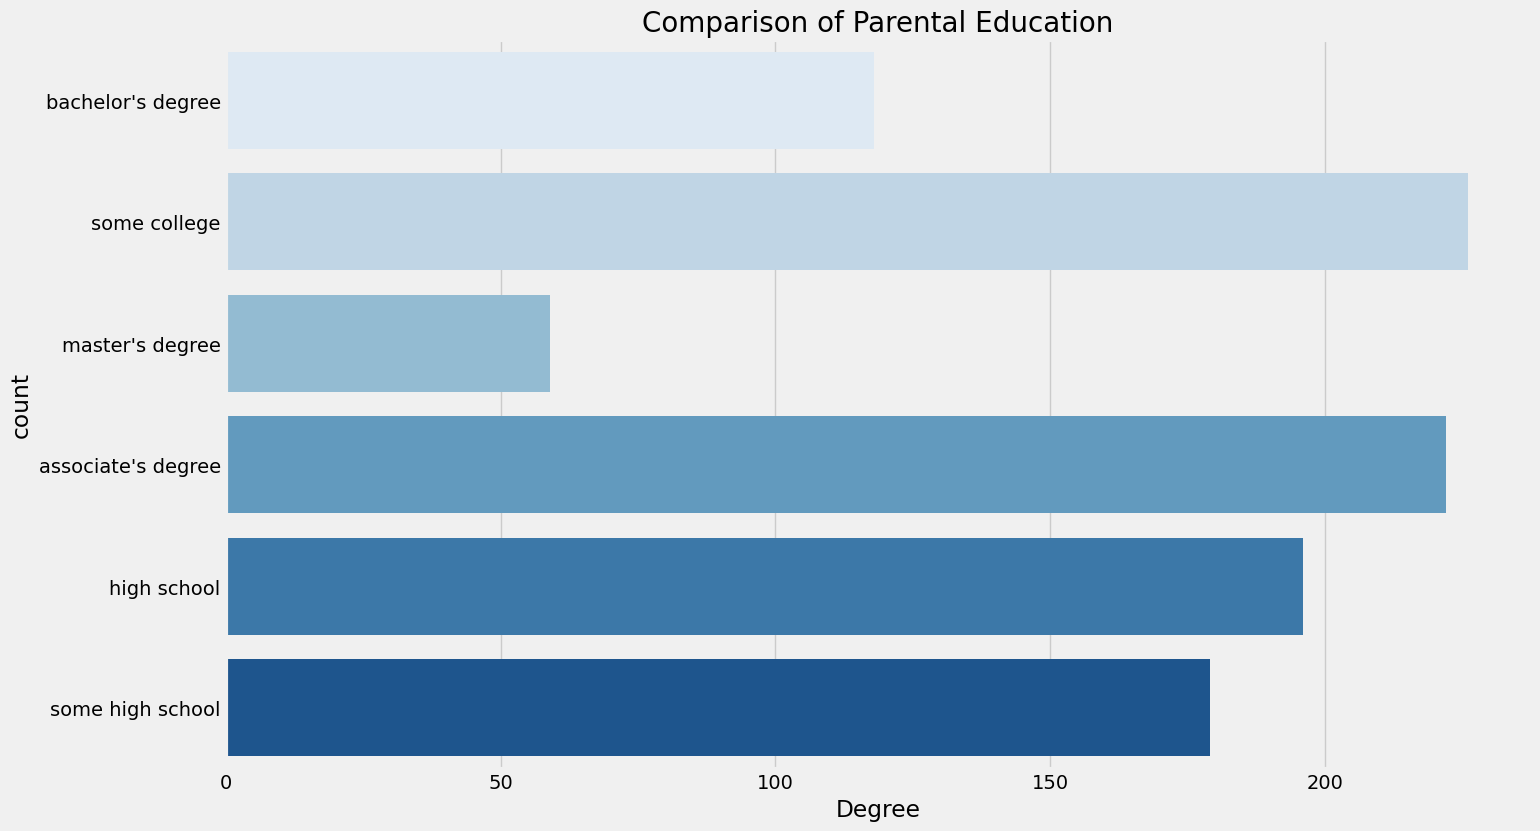

In [34]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )


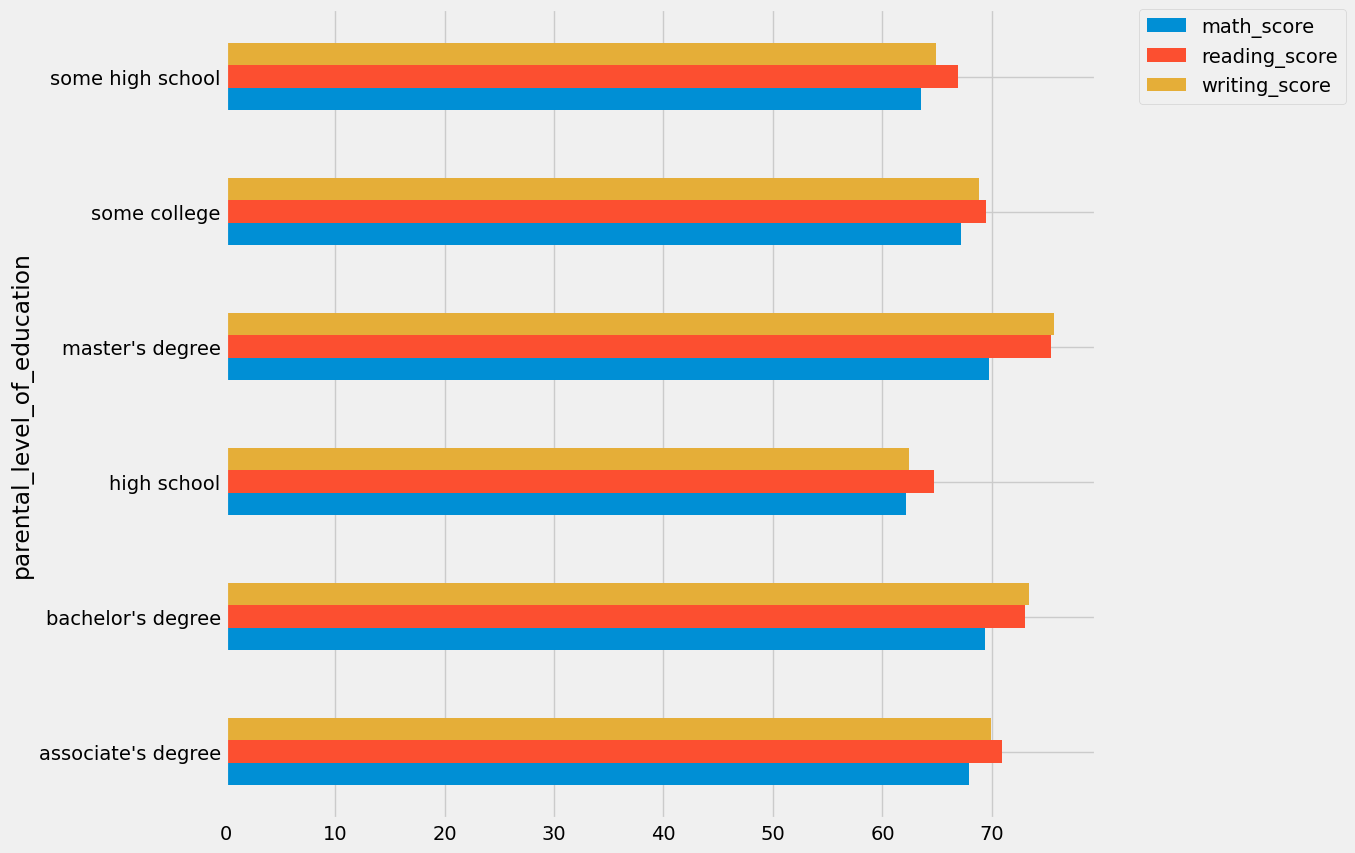

In [35]:
df.groupby('parental_level_of_education')[numeric_features].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

LUNCH COLUMN
#
Which type of lunch is most common amoung students ?
#
What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

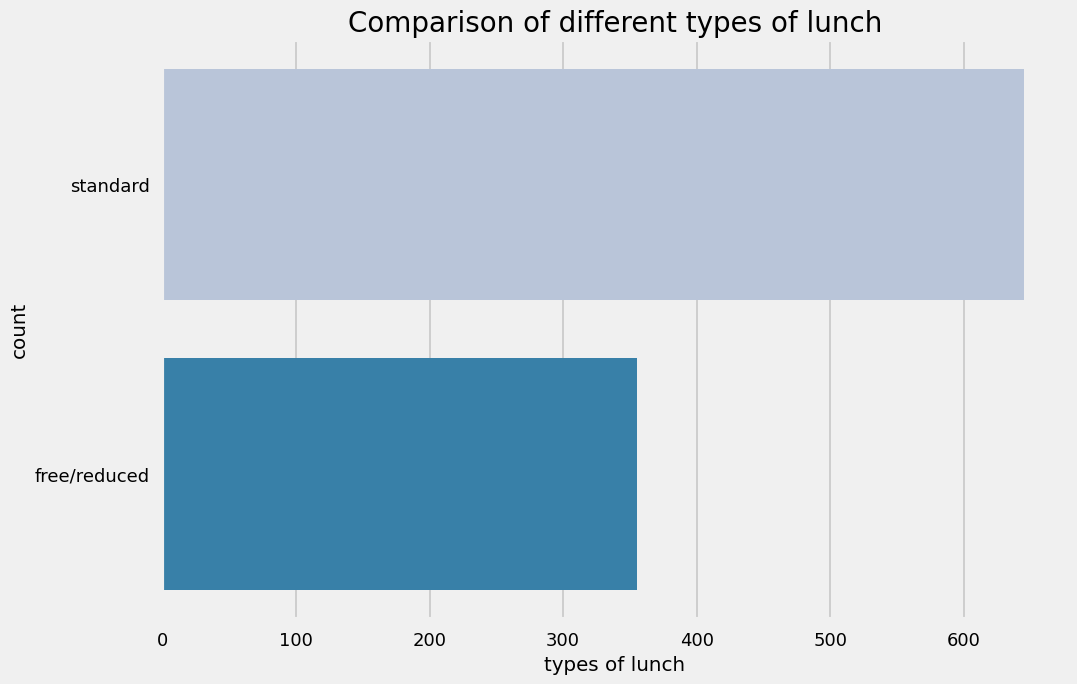

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )


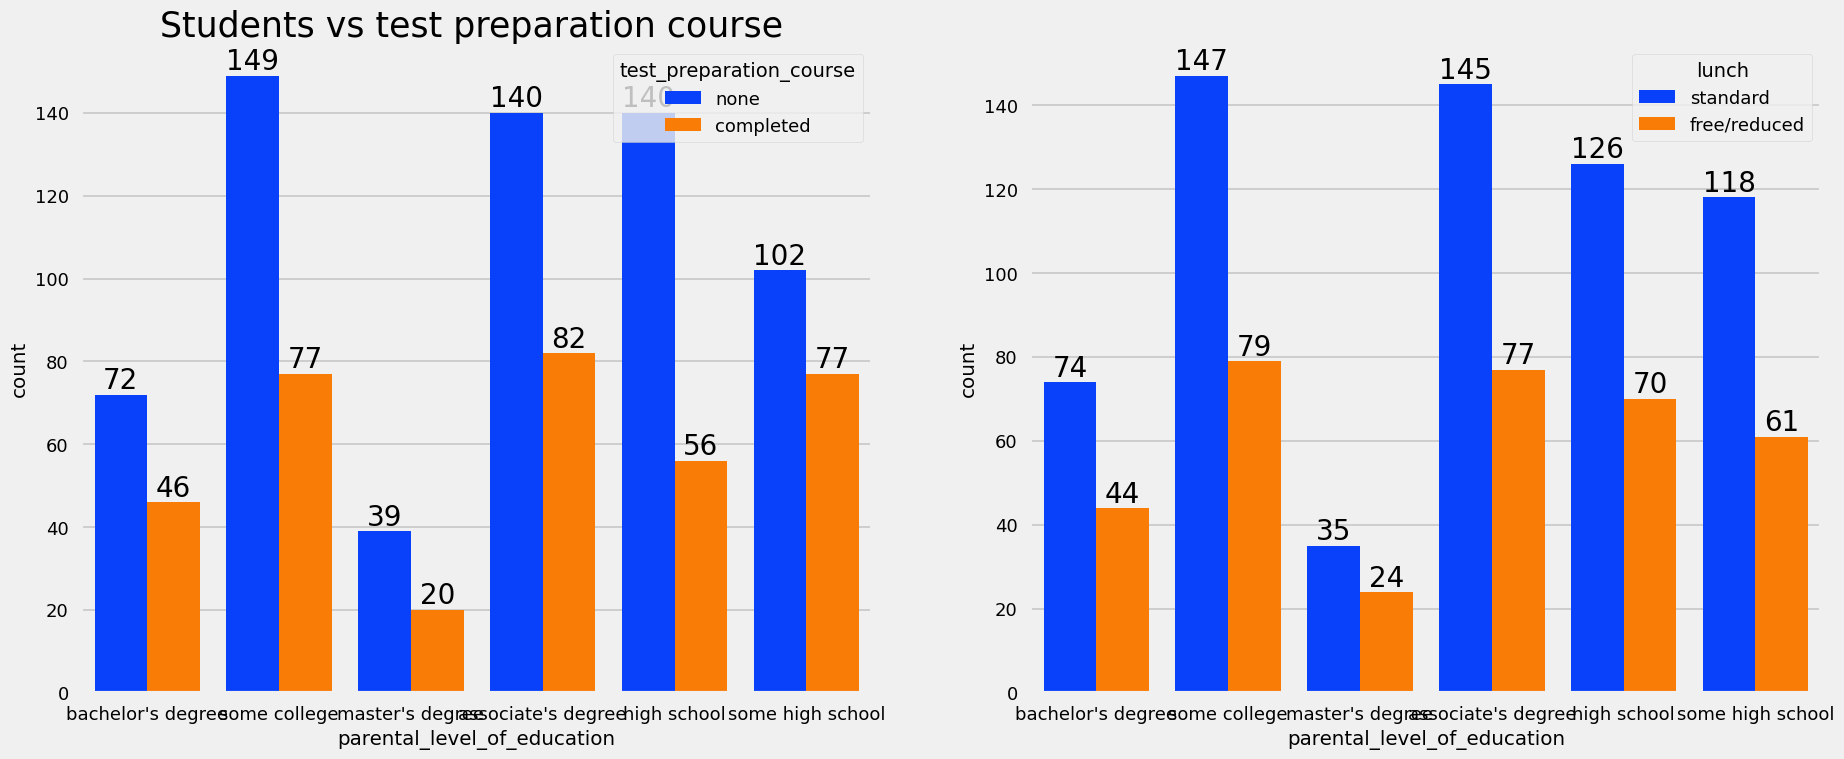

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

TEST PREPARATION COURSE COLUMN
#
Which type of lunch is most common amoung students ?
#
Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

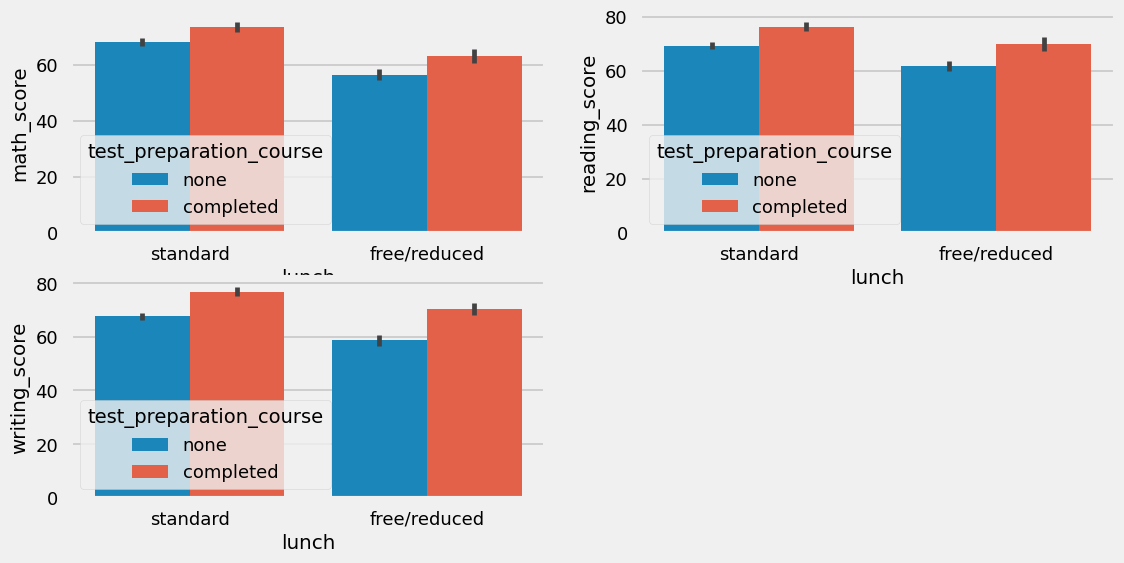

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

 CHECKING OUTLIERS

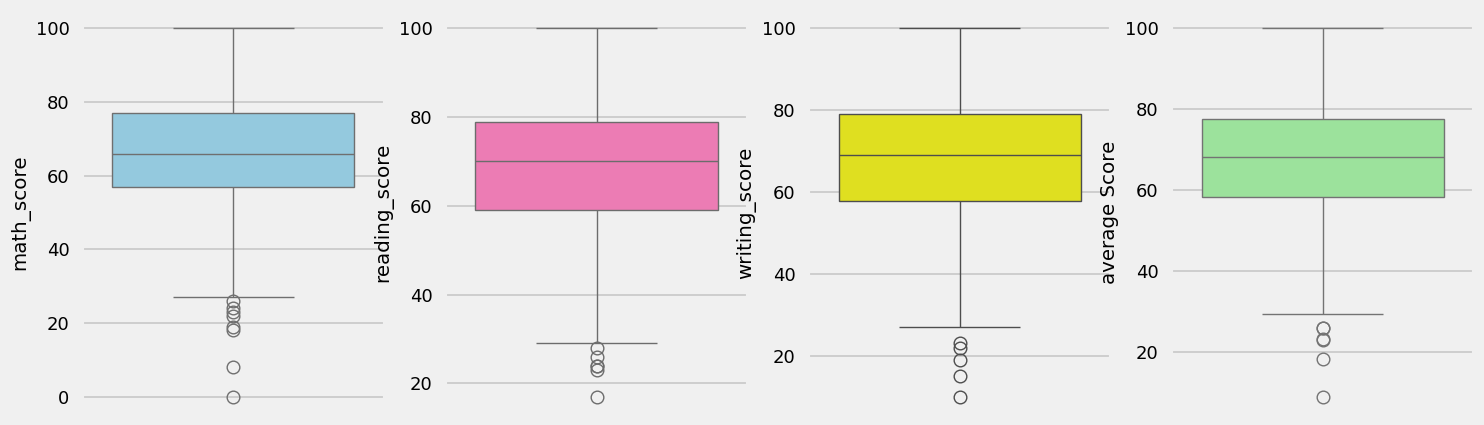

In [43]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average Score'],color='lightgreen')
plt.show()


MUTIVARIATE ANALYSIS USING PAIRPLOT

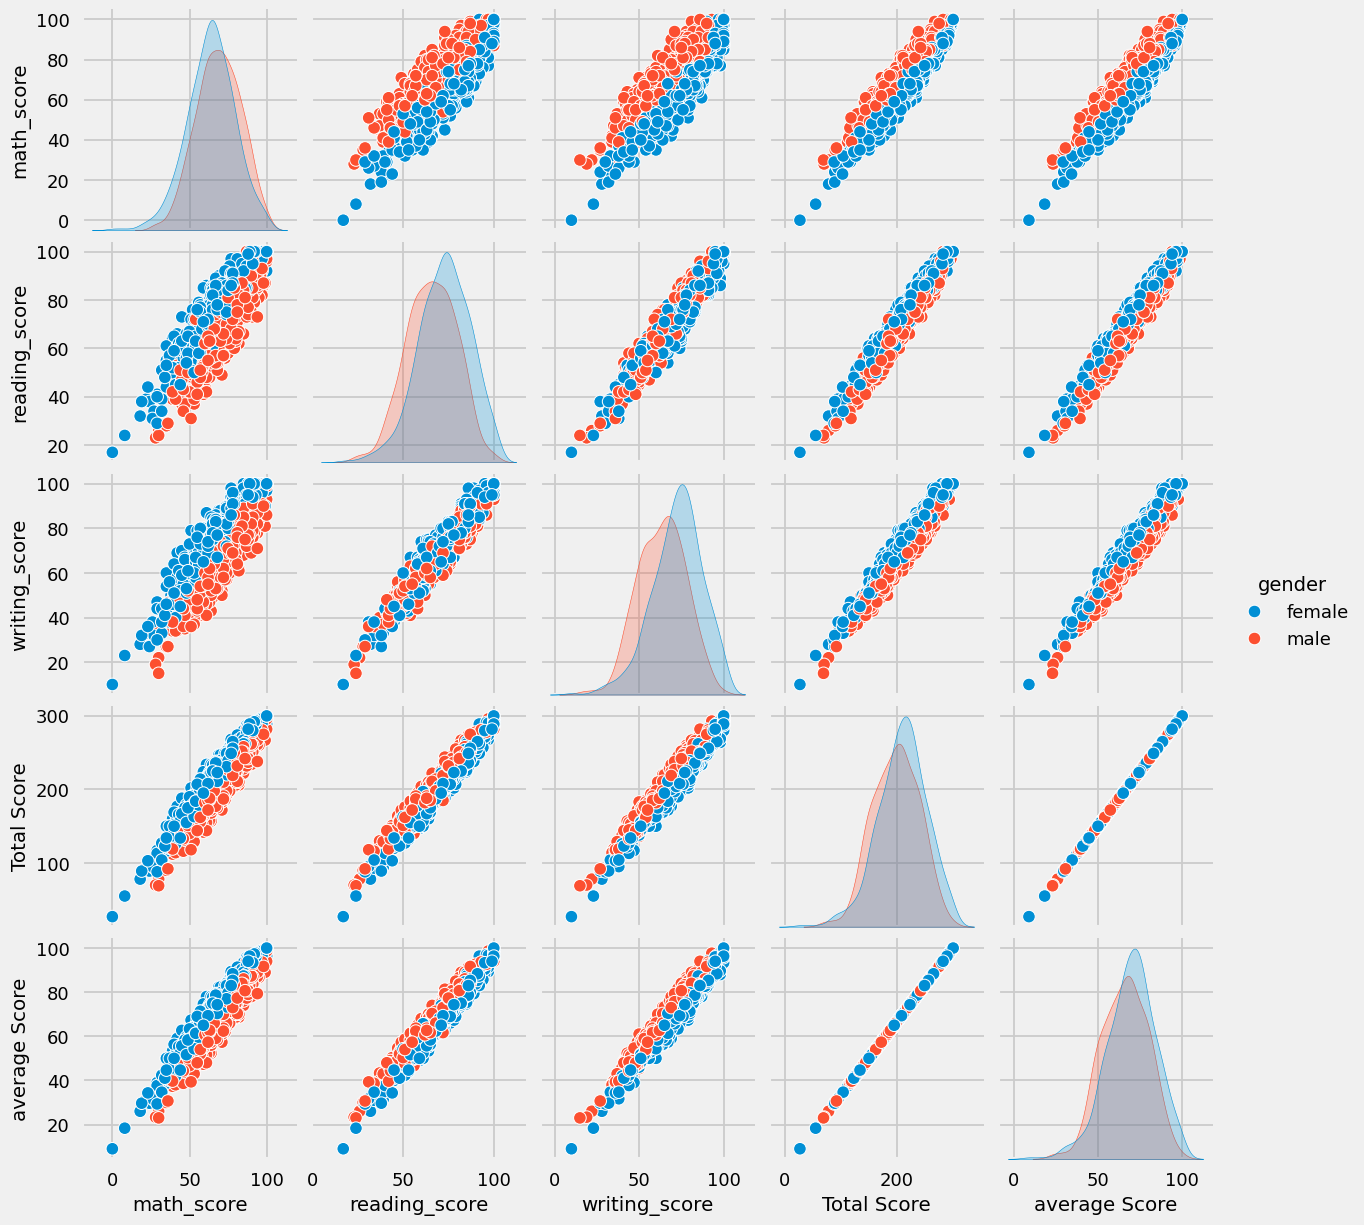

In [44]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Conclusions
#
Student's Performance is related with lunch, race, parental level education
#
Females lead in pass percentage and also are top-scorers
#
Student's Performance is not much related with test preparation course
#
Finishing preparation course is benefitial.